In [15]:
sample_years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
sample_durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]
sample_movie_dict = {
 'years': sample_years,
 'durations': sample_durations
}
sample_movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [16]:
import pandas as pd
sample_durations_df = pd.DataFrame(sample_movie_dict)
sample_durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


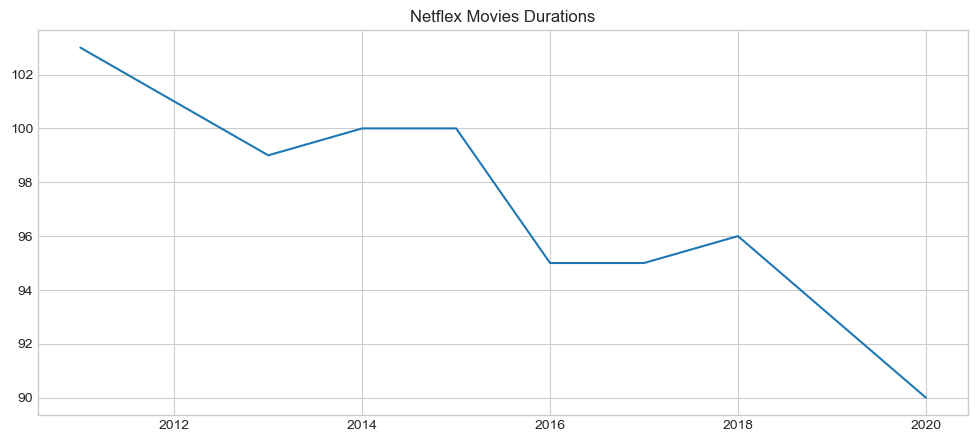

In [17]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 5))
# Draw a line plot of release_years and durations
plt.plot(sample_durations_df['years'], sample_durations_df['durations'])
# Create a title
plt.title('Netflex Movies Durations')
# Show the plot
plt.show()


In [18]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv(r'Netflix Dataset.csv')
# Print the first five rows of the DataFrame
netflix_df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [19]:
netflix_df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [20]:
Date = netflix_df.Release_Date.to_list()
durations = netflix_df.Duration.to_list()
movie_dict = {
    'Date': Date,
    'durations': durations
}

In [21]:
durations_df = pd.DataFrame(movie_dict)
durations_df.head(10)

,Date,durations
0,"August 14, 2020",4 Seasons
1,"December 23, 2016",93 min
2,"December 20, 2018",78 min
3,"November 16, 2017",80 min
4,"January 1, 2020",123 min
5,"July 1, 2017",1 Season
6,"June 1, 2020",95 min
7,"November 1, 2019",119 min
8,"April 1, 2019",118 min
9,"December 15, 2017",143 min


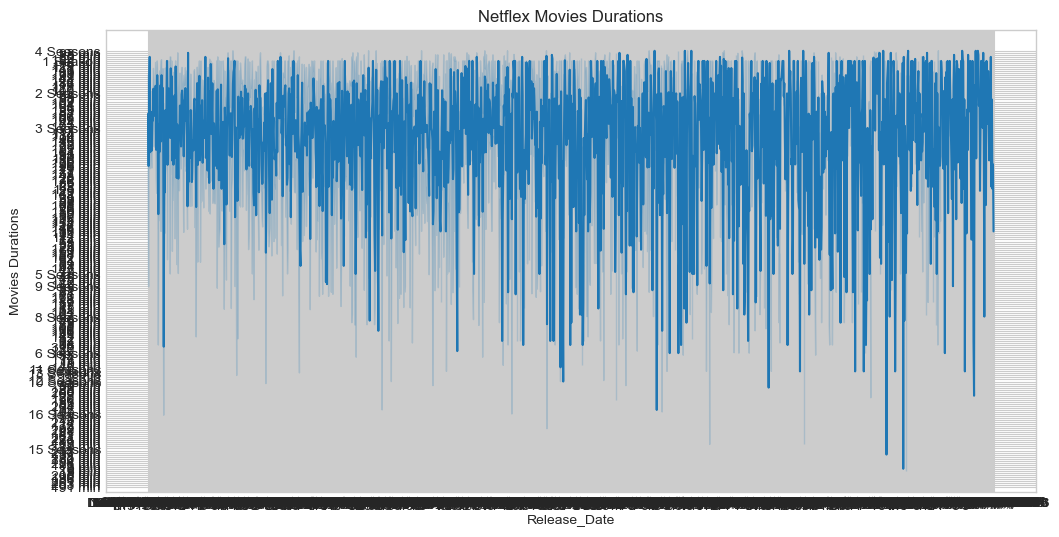

In [57]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8-whitegrid')
sns.lineplot(x='Date', y='durations', data=durations_df)
plt.title('Netflex Movies Durations')
plt.xlabel('Release_Date')
plt.ylabel('Movies Durations')
plt.show()

In [28]:
# Subset the DataFrame for type "Movie" only
netflix_movies_df = netflix_df[netflix_df['Category'] == 'Movie']

# Select only the columns of interest
netflix_movies_col_subset = netflix_movies_df[['Title', 'Country', 'Type', 'Release_Date', 'Duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,Title,Country,Type,Release_Date,Duration
1,07:19,Mexico,"Dramas, International Movies","December 23, 2016",93 min
2,23:59,Singapore,"Horror Movies, International Movies","December 20, 2018",78 min
3,9,United States,"Action & Adventure, Independent Movies, Sci-Fi...","November 16, 2017",80 min
4,21,United States,Dramas,"January 1, 2020",123 min
6,122,Egypt,"Horror Movies, International Movies","June 1, 2020",95 min


In [66]:
durations_df['Date'] = pd.to_datetime(durations_df['Date'], errors='coerce')


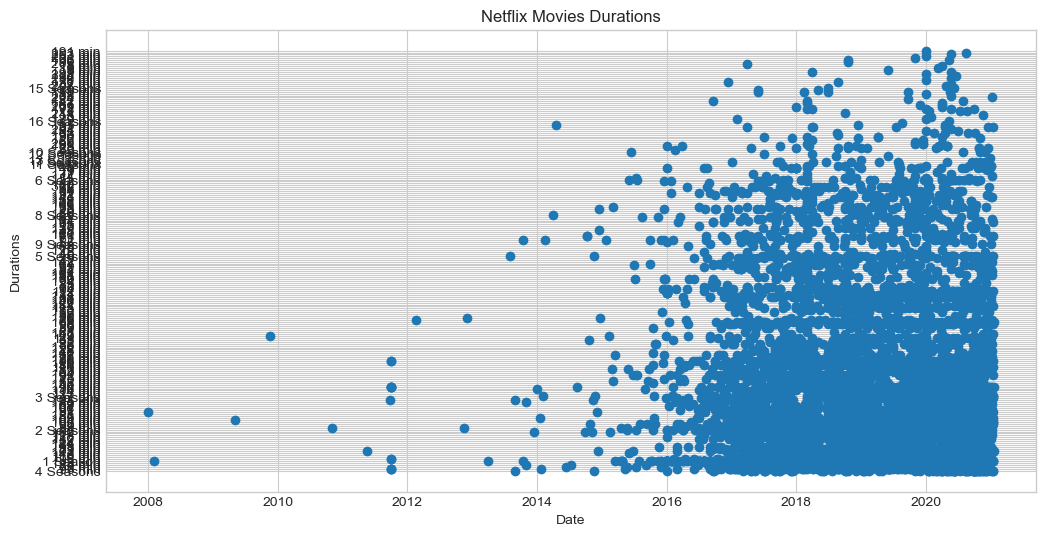

In [67]:
fig = plt.figure(figsize=(12,6))
plt.scatter(durations_df['Date'], durations_df['durations'])
plt.title('Netflix Movies Durations')
plt.xlabel('Date')
plt.ylabel('Durations')
plt.show()


In [63]:
netflix_movies_df['Duration'] = netflix_movies_df['Duration'].str.replace(' min','').astype(int)

short_movies = netflix_movies_df[netflix_movies_df['Duration'] < 20]
short_movies.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
463,s464,Movie,American Factory: A Conversation with the Obamas,NaN,"President Barack Obama, Michelle Obama, Julia ...",United States,"September 5, 2019",TV-G,10,Documentaries,Barack and Michelle Obama talk with directors ...
527,s528,Movie,ANIMA,Paul Thomas Anderson,Thom Yorke,United Kingdom,"June 27, 2019",TV-PG,15,"Dramas, Independent Movies, Music & Musicals",In a short musical film directed by Paul Thoma...
1128,s1129,Movie,Buddy Thunderstruck: The Maybe Pile,Harry Chaskin,"Brian Atkinson, Ted Raimi, Harry Chaskin, Debi...",United States,"July 14, 2017",TV-Y7,14,Movies,Champion truck-racing dog Buddy and his best f...
1175,s1176,Movie,Calico Critters: A Town of Dreams,Momoko Kamiya,NaN,NaN,"November 1, 2018",TV-Y,11,Children & Family Movies,Freya heads into town with her mother for a ve...
1176,s1177,Movie,Calico Critters: Everyone's Big Dream Flying i...,Momoko Kamiya,Erika Harlacher,NaN,"March 1, 2020",TV-Y,11,Children & Family Movies,"In the Hazelnut Chipmunk Family, Dominic is a ..."


In [71]:
colors = []
for rows, columns in netflix_movies_col_subset.iterrows() :
    if columns['Type'] == 'Children':
        colors.append('red')
    elif columns['Type'] == 'Stand-Up':
        colors.append('green')
    elif columns['Type'] == 'Documentaries':
        colors.append('blue')
    else:
        colors.append('black')
colors[:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black']

In [74]:
netflix_movies_col_subset.columns

Index(['Title', 'Country', 'Type', 'Release_Date', 'Duration'], dtype='object')

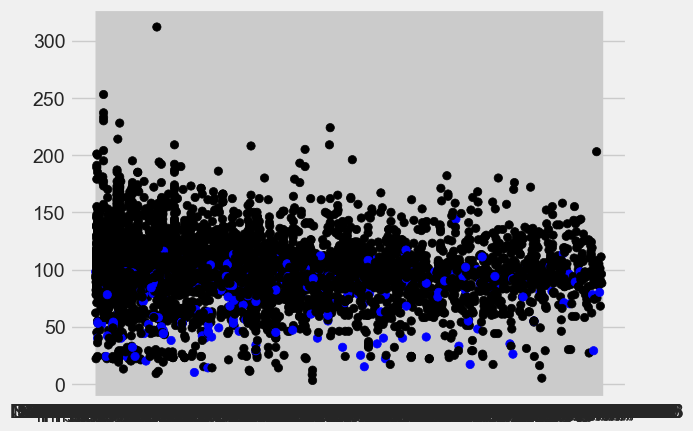

In [80]:
plt.scatter(netflix_movies_df['Release_Date'],
            netflix_movies_df['Duration'],
            c=colors)



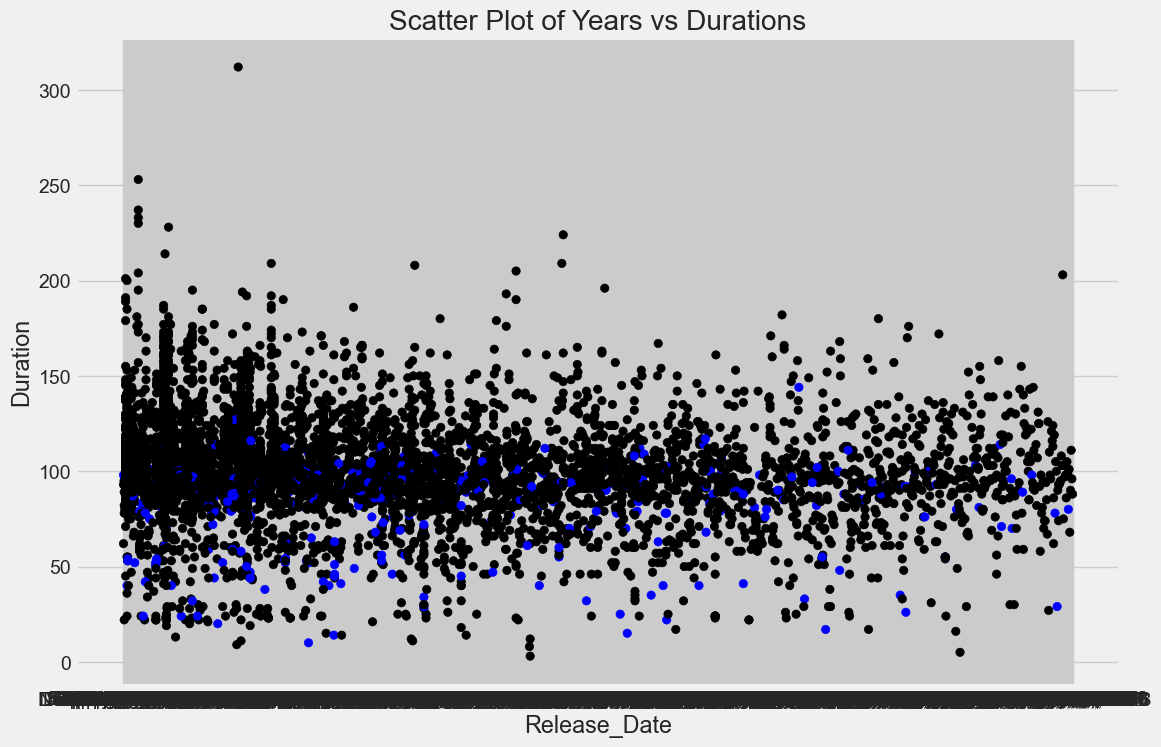

In [84]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_movies_df['Release_Date'],
            netflix_movies_df['Duration'],
            c=colors)

plt.title('Scatter Plot of Years vs Durations')
plt.xlabel('Release_Date')
plt.ylabel('Duration')

plt.show()


In [85]:
are_movies_getting_shorter = 'Yes the movies are the getting shorter by each year.'